In [ ]:
import pandas as pd
import matplotlib
import matplotlib.pyplot as plt
import numpy as np
import seaborn as sns
%matplotlib inline
matplotlib.style.use('fivethirtyeight')
FILENAME = 'car_price_dataset.csv'

In [ ]:
def hypothesisFunc(x, theta):
    return theta[1] * x + theta[0]

def makeScatter(df, xname, yname):
    x = df[xname]
    y = df[yname]
    plt.scatter(x, y)
    plt.xlabel(xname)
    plt.ylabel(yname)
    plt.show()

In [ ]:
df = pd.read_csv(FILENAME, delimiter = ',')

In [ ]:
df.head().append(df.tail())

,car_ID,symboling,CarName,fueltype,aspiration,doornumber,carbody,drivewheel,enginelocation,wheelbase,...,enginesize,fuelsystem,boreratio,stroke,compressionratio,horsepower,peakrpm,citympg,highwaympg,price
0,1,3,alfa-romero giulia,gas,std,two,convertible,rwd,front,88.6,...,130,mpfi,3.47,2.68,9.0,111,5000,21,27,13495.0
1,2,3,alfa-romero stelvio,gas,std,two,convertible,rwd,front,88.6,...,130,mpfi,3.47,2.68,9.0,111,5000,21,27,16500.0
2,3,1,alfa-romero Quadrifoglio,gas,std,two,hatchback,rwd,front,94.5,...,152,mpfi,2.68,3.47,9.0,154,5000,19,26,16500.0
3,4,2,audi 100 ls,gas,std,four,sedan,fwd,front,99.8,...,109,mpfi,3.19,3.40,10.0,102,5500,24,30,13950.0
4,5,2,audi 100ls,gas,std,four,sedan,4wd,front,99.4,...,136,mpfi,3.19,3.40,8.0,115,5500,18,22,17450.0
200,201,-1,volvo 145e (sw),gas,std,four,sedan,rwd,front,109.1,...,141,mpfi,3.78,3.15,9.5,114,5400,23,28,16845.0
201,202,-1,volvo 144ea,gas,turbo,four,sedan,rwd,front,109.1,...,141,mpfi,3.78,3.15,8.7,160,5300,19,25,19045.0
202,203,-1,volvo 244dl,gas,std,four,sedan,rwd,front,109.1,...,173,mpfi,3.58,2.87,8.8,134,5500,18,23,21485.0
203,204,-1,volvo 246,diesel,turbo,four,sedan,rwd,front,109.1,...,145,idi,3.01,3.40,23.0,106,4800,26,27,22470.0
204,205,-1,volvo 264gl,gas,turbo,four,sedan,rwd,front,109.1,...,141,mpfi,3.78,3.15,9.5,114,5400,19,25,22625.0


In [ ]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 205 entries, 0 to 204
Data columns (total 26 columns):
car_ID              205 non-null int64
symboling           205 non-null int64
CarName             205 non-null object
fueltype            205 non-null object
aspiration          205 non-null object
doornumber          205 non-null object
carbody             205 non-null object
drivewheel          205 non-null object
enginelocation      205 non-null object
wheelbase           205 non-null float64
carlength           205 non-null float64
carwidth            205 non-null float64
carheight           205 non-null float64
curbweight          205 non-null int64
enginetype          205 non-null object
cylindernumber      205 non-null object
enginesize          205 non-null int64
fuelsystem          205 non-null object
boreratio           205 non-null float64
stroke              205 non-null float64
compressionratio    205 non-null float64
horsepower          205 non-null int64
peakrpm      

In [ ]:
df.describe()

,car_ID,symboling,wheelbase,carlength,carwidth,carheight,curbweight,enginesize,boreratio,stroke,compressionratio,horsepower,peakrpm,citympg,highwaympg,price
count,205.000000,205.000000,205.000000,205.000000,205.000000,205.000000,205.000000,205.000000,205.000000,205.000000,205.000000,205.000000,205.000000,205.000000,205.000000,205.000000
mean,103.000000,0.834146,98.756585,174.049268,65.907805,53.724878,2555.565854,126.907317,3.329756,3.255415,10.142537,104.117073,5125.121951,25.219512,30.751220,13276.710571
std,59.322565,1.245307,6.021776,12.337289,2.145204,2.443522,520.680204,41.642693,0.270844,0.313597,3.972040,39.544167,476.985643,6.542142,6.886443,7988.852332
min,1.000000,-2.000000,86.600000,141.100000,60.300000,47.800000,1488.000000,61.000000,2.540000,2.070000,7.000000,48.000000,4150.000000,13.000000,16.000000,5118.000000
25%,52.000000,0.000000,94.500000,166.300000,64.100000,52.000000,2145.000000,97.000000,3.150000,3.110000,8.600000,70.000000,4800.000000,19.000000,25.000000,7788.000000
50%,103.000000,1.000000,97.000000,173.200000,65.500000,54.100000,2414.000000,120.000000,3.310000,3.290000,9.000000,95.000000,5200.000000,24.000000,30.000000,10295.000000
75%,154.000000,2.000000,102.400000,183.100000,66.900000,55.500000,2935.000000,141.000000,3.580000,3.410000,9.400000,116.000000,5500.000000,30.000000,34.000000,16503.000000
max,205.000000,3.000000,120.900000,208.100000,72.300000,59.800000,4066.000000,326.000000,3.940000,4.170000,23.000000,288.000000,6600.000000,49.000000,54.000000,45400.000000


In [ ]:
df.isna().sum()

car_ID              0
symboling           0
CarName             0
fueltype            0
aspiration          0
doornumber          0
carbody             0
drivewheel          0
enginelocation      0
wheelbase           0
carlength           0
carwidth            0
carheight           0
curbweight          0
enginetype          0
cylindernumber      0
enginesize          0
fuelsystem          0
boreratio           0
stroke              0
compressionratio    0
horsepower          0
peakrpm             0
citympg             0
highwaympg          0
price               0
dtype: int64

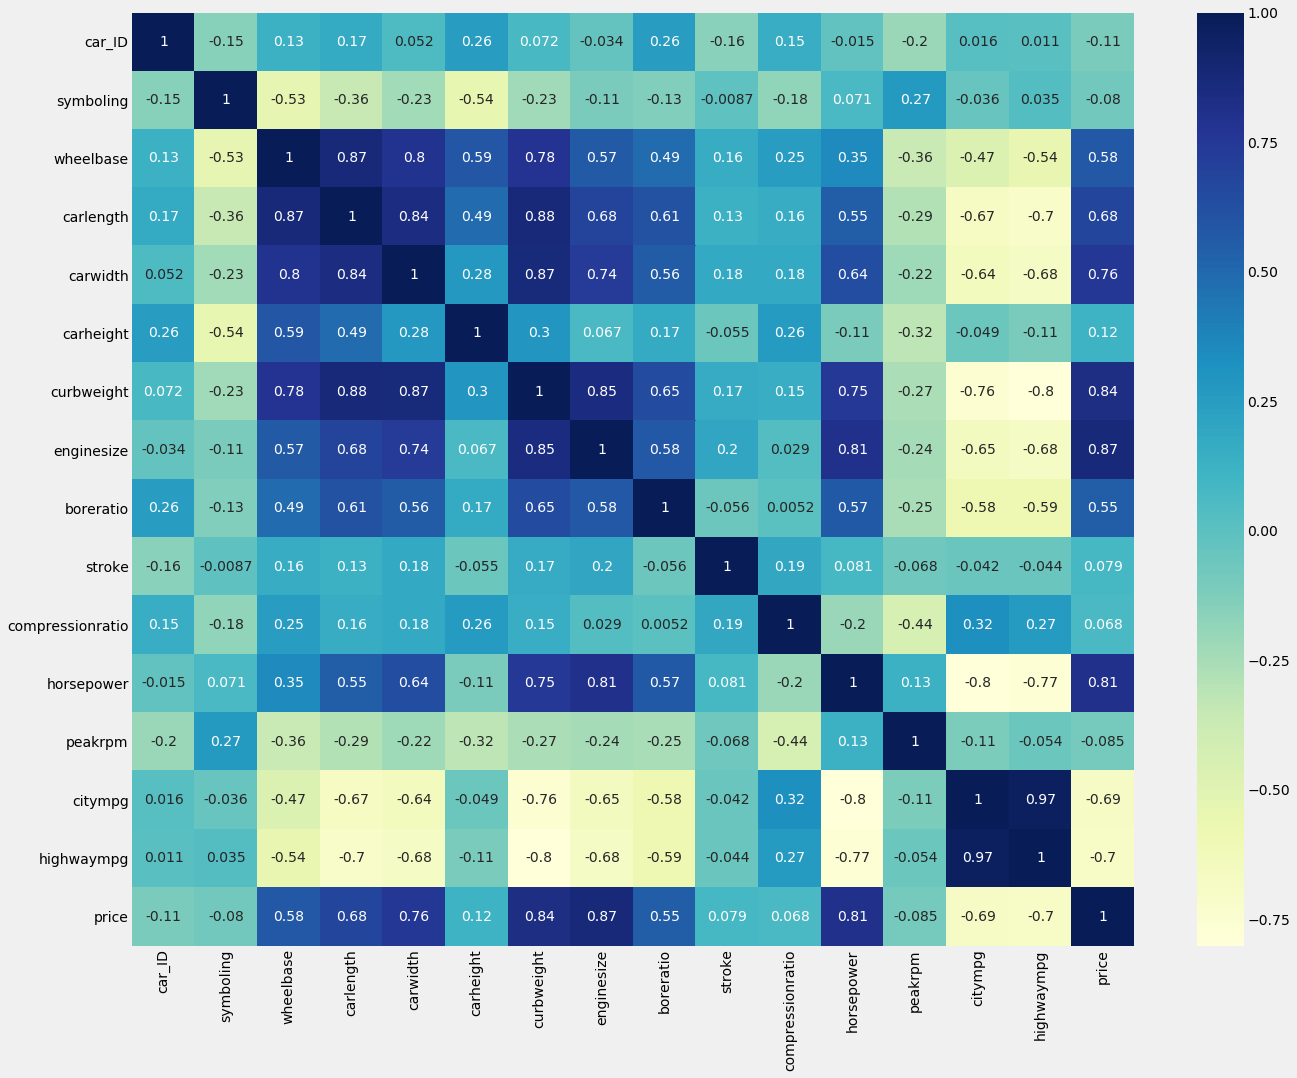

In [ ]:
plt.figure(figsize = (20, 16))
sns.heatmap(df.corr(), annot = True, cmap="YlGnBu")
plt.show()

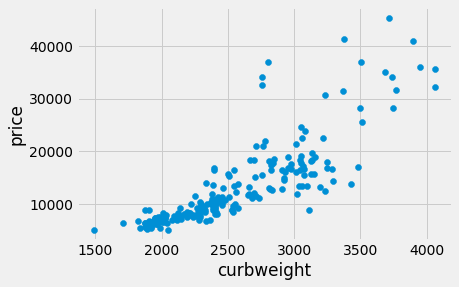

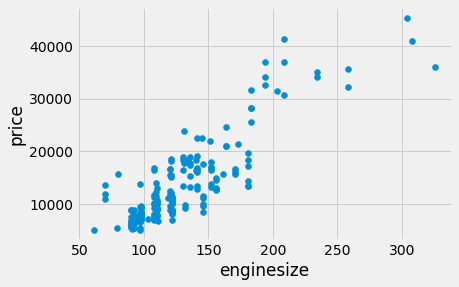

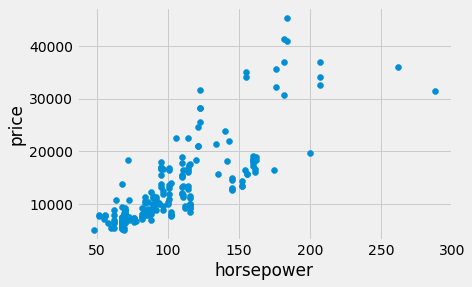

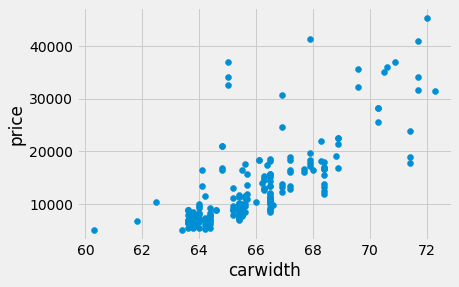

In [ ]:
makeScatter(df, 'curbweight', 'price')
makeScatter(df, 'enginesize', 'price')
makeScatter(df, 'horsepower', 'price')
makeScatter(df, 'carwidth', 'price')

In [ ]:
def normalEquation(df, feature):
    x = pd.DataFrame(df[feature])
    x['0'] = 1
    x = x.rename(columns={feature: '1'})
    columnsTitles = ['0','1']
    x = x.reindex(columns=columnsTitles)
    xT = x.transpose()
    xtx = xT.dot(x)
    xtxInv = pd.DataFrame(np.linalg.inv(xtx.values), xtx.columns, xtx.index)
    y = df['price']
    y = y.rename(columns={'price': '0'})
    xty = xT.dot(y)
    theta = xtxInv.dot(xty)
    print(theta)
    
    m = len(x)
    xtheta = x.dot(theta)
    xthetay = xtheta.subtract(y)
    xthetayT = xthetay.transpose()
    cost = xthetayT.dot(xthetay)/(2*m)
    print("Cost = ", cost)
    
    x1 = df[feature]
    y1 = df['price']
    plt.scatter(x1, y1)
    plt.plot(x1, hypothesisFunc(x1, theta), color='r')
    plt.xlabel(feature)
    plt.ylabel('price')
    plt.legend(['estimation based on Normal Equation', 'correlation'])

0   -3721.761494
1     163.263061
dtype: float64
Cost =  11016254.851154966


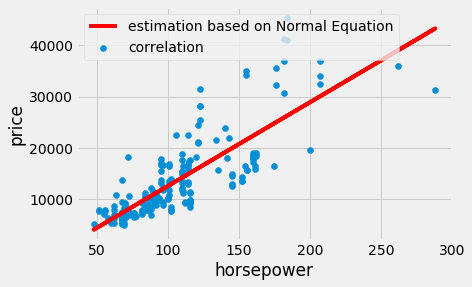

In [ ]:
normalEquation(df, 'horsepower')

0   -8005.445531
1     167.698416
dtype: float64
Cost =  7490130.702775659


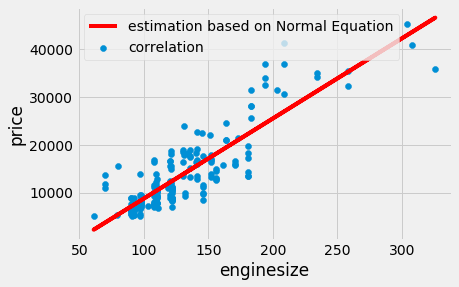

In [ ]:
normalEquation(df, 'enginesize')

0   -19475.862380
1       12.816173
dtype: float64
Cost =  9598515.04358383


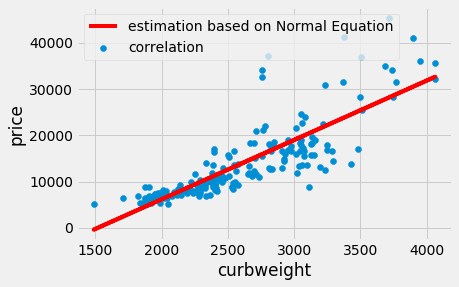

In [ ]:
normalEquation(df, 'curbweight')